In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#For plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model

In [86]:
if not os.path.exists("../data/prep/500-game_series.csv"):
    print("Missing dataset file")
else:
    print("Success!")

Success!


In [87]:
df=pd.read_csv('../data/prep/500-game_series.csv')
df.head()

series_name                     name  global_sales    na_sales  \
0  grand theft auto         Grand Theft Auto      240000.0    170000.0   
1  grand theft auto       Grand Theft Auto 2     3420000.0   1130000.0   
2  grand theft auto     Grand Theft Auto III    13110000.0   6990000.0   
3  grand theft auto      Grand Theft Auto IV    22530000.0  11600000.0   
4  grand theft auto  Grand Theft Auto Online       10000.0         0.0   

    eu_sales  jp_sales  other_sales  meta_critic_score  meta_user_score  \
0    60000.0       0.0          0.0               68.0              7.1   
1  2070000.0       0.0     220000.0               70.0              7.9   
2  4520000.0  300000.0    1300000.0               95.0              8.4   
3  7640000.0  580000.0    2720000.0               95.3              7.4   
4    10000.0       0.0          0.0               83.0              5.9   

  release_date  release_year  length  
0   2004-10-26          2004      14  
1   1999-10-25          1999      14  
2   2001-10-23          2001      14  
3   2008-04-29          2008      14  
4   2013-10-01          2013      14

## **Do video game series get worse?**

In the beginning I was going to get the percentage change in sales and ratings from one game in the series to the next. The I was going to get the mean of these values for each series. This seemed like a good idea at first, but when I thought about it more, I realised that it wasn’t a very accurate technique. Have have explained why I dcided not to use this method in my report.

In [88]:
better=0
worse=0
for i in df['series_name'].unique():
    l=df[df['series_name']==i]
    l=l.sort_values(by='release_date',ascending=True)
    if l['global_sales'].pct_change().mean() > 0:
        better+=1
    else:
        worse+=1

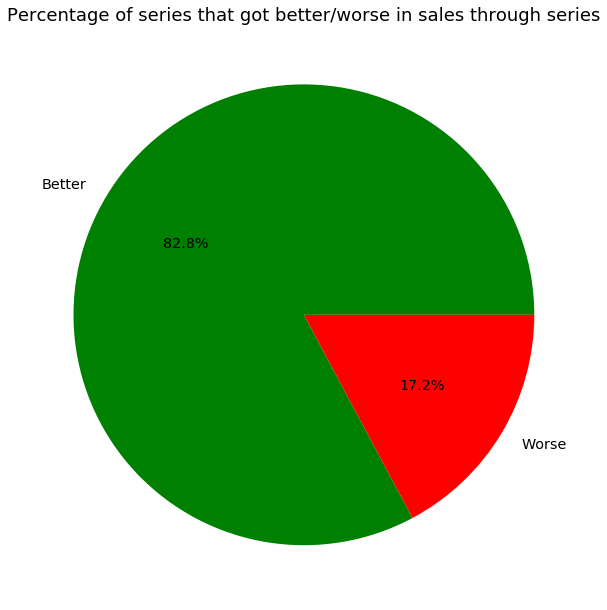

In [89]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_axes([0.1, 0.1,0.8,0.8])
plt.title('Percentage of series that got better/worse in sales through series',fontsize=18)

labels = 'Better', 'Worse'
colors= 'green','red'
fracs = [better,worse]

patches, texts, autotexts = ax.pie(fracs, labels=labels, colors=colors, autopct='%1.1f%%')

proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.show()

Using this method, we find that 82.8% of the series actually got better in sales. These results dont mean anything as the technique we used isnt accuarte.

I decided that the best method to use to see if a series got better/worse was to plot the performance of each series as a line graph. The x axis shows the release date of each game in the series while the y axis shows the sales/ ratings for each game. I then plotted a liner regression line. If the slope of this line was positive, then the series got better and if the slope was negative, the series got worse.

In [90]:
table = pd.pivot_table(df,index=['release_year'],
                     columns=['series_name'],values=['global_sales'],aggfunc=np.median)
table.columns = table.columns.get_level_values(1)

table1 = pd.pivot_table(df,index=['release_year'],
                     columns=['series_name'],values=['meta_critic_score'],aggfunc=np.median)
table1.columns = table1.columns.get_level_values(1)

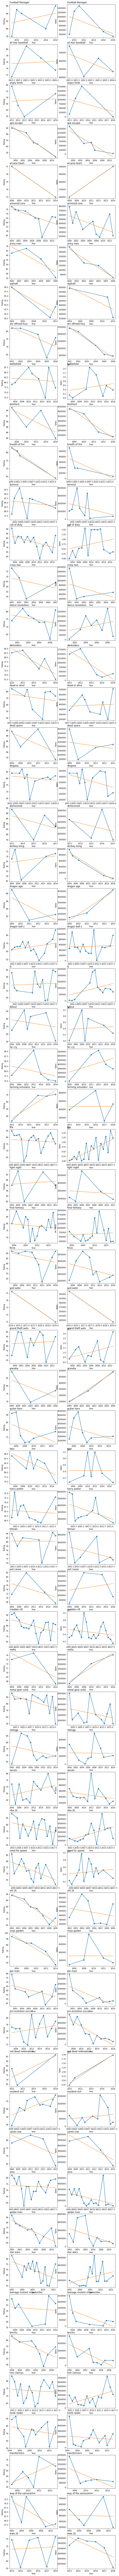

In [91]:
# multiple line plot
num=1
ratings_better_list=[]
sales_better_list=[]
sales_better=0
sales_worse=0
ratings_better=0
ratings_worse=0
plt.figure(figsize=(10,250))
for column in table1:
    data= table1[column].dropna()
    years=data.index
    values=data.values
    labels=table1.index
    # Find the right spot on the plot
    plt.subplot(64,2, num)
    # Plot the lineplot
    plt.plot(years,values, marker='o',linewidth=1.9, alpha=0.9, label=column)
    plt.xlabel('Year')
    plt.ylabel('Rating')
    #plt.xticks(labels)
    
    m, b = np.polyfit(data.index, data.values,1)
    if m > 0:
        
        ratings_better+=1
        ratings_better_list.append(column)
    else:
        ratings_worse+=1
    
    plt.plot(data.index, m*data.index + b)
    plt.title(column, loc='left', fontsize=12, fontweight=0 )
    
    plt.subplot(64,2, num+1)
    plt.plot(table[column].dropna(), marker='o',linewidth=1.9, alpha=0.9, label=column)
    data1= table[column].dropna()
    m1, b1 = np.polyfit(data1.index, data1.values,1)
    if m1 > 0:
        sales_better+=1
        sales_better_list.append(column)
    else:
        sales_worse+=1
    plt.plot(data1.index, m1*data.index + b1)
    plt.xlabel('Year')
    plt.ylabel('Sales')
    #plt.xticks(labels,rotation=90)

 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0 )
    num+=2


In [92]:
print(len(sales_better_list),'series got better in sales')

23 series got better in sales


In [93]:
print(len(ratings_better_list),'series got better in sales')

15 series got better in sales


In [61]:
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        print(a_set & b_set, 'Got better in both Sales and Ratings' )
    else: 
        print("No common elements")

In [62]:
common_member(ratings_better_list,sales_better_list)

{'red dead redemption', 'dragon ball z', 'grand theft auto', 'farming simulator', 'f1', 'resident evil'} Got better in both Sales and Ratings


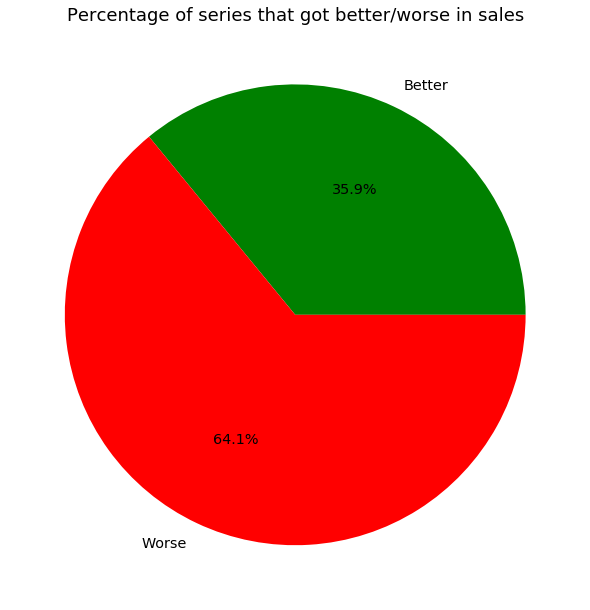

In [94]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_axes([0.1, 0.1,0.8,0.8])
plt.title('Percentage of series that got better/worse in sales',fontsize=18)

labels = 'Better', 'Worse'
colors= 'green','red'
fracs = [sales_better,sales_worse]

patches, texts, autotexts = ax.pie(fracs, labels=labels, colors=colors, autopct='%1.1f%%')

proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.show()

This pie chart shows that 64.1% of the series got worse in sales. Thats surprisingly high.

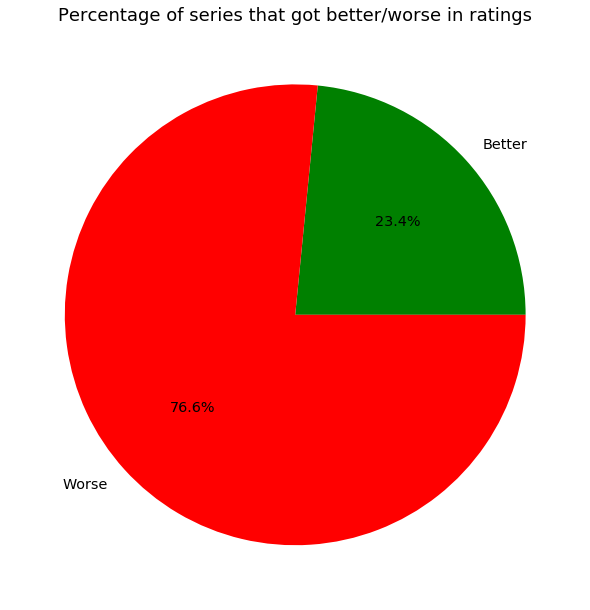

In [95]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_axes([0.1, 0.1,0.8,0.8])
plt.title('Percentage of series that got better/worse in ratings',fontsize=18)

labels = 'Better', 'Worse'
colors= 'green','red'
fracs = [ratings_better,ratings_worse]

patches, texts, autotexts = ax.pie(fracs, labels=labels, colors=colors, autopct='%1.1f%%')

proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.show()

This pie chart shows that 76.6% of series got worse in ratings.

It seems like on average, a series gets wore in both ratings and sales. Now I want to see if the length of the series has an effect on this. Personally I think that series that have been running for a shorter time may actually get better on average and longer running series tend to get worse as because they are dragging on too long. Lets see if this is true.

## **Series that have lasted more than 6 years**

In [67]:
newdf=df[df['length']>6]
table = pd.pivot_table(newdf,index=['release_year'],
                     columns=['series_name'],values=['global_sales'],aggfunc=np.median)
table.columns = table.columns.get_level_values(1)

table1 = pd.pivot_table(newdf,index=['release_year'],
                     columns=['series_name'],values=['meta_critic_score'],aggfunc=np.median)
table1.columns = table1.columns.get_level_values(1)

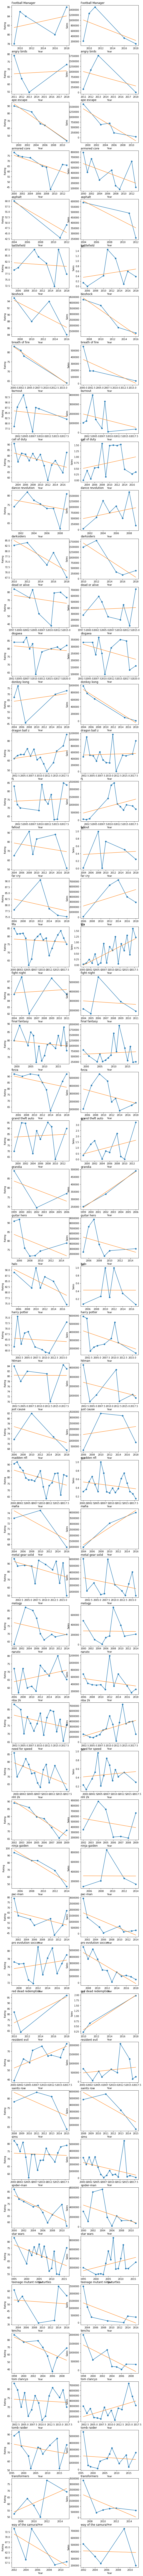

In [71]:
# multiple line plot
num=1
ratings_better_list=[]
long_better_list=[]
long_sales_better=0
long_sales_worse=0
long_ratings_better=0
long_ratings_worse=0
plt.figure(figsize=(10,250))
for column in table1:
    data= table1[column].dropna()
    years=data.index
    values=data.values
    labels=table1.index
    # Find the right spot on the plot
    plt.subplot(64,2, num)
    # Plot the lineplot
    plt.plot(years,values, marker='o',linewidth=1.9, alpha=0.9, label=column)
    plt.xlabel('Year')
    plt.ylabel('Rating')
    #plt.xticks(labels)
    
    m, b = np.polyfit(data.index, data.values,1)
    if m > 0:
        long_ratings_better+=1
        ratings_better_list.append(column)
    else:
        long_ratings_worse+=1
    
    plt.plot(data.index, m*data.index + b)
    plt.title(column, loc='left', fontsize=12, fontweight=0 )
    
    plt.subplot(64,2, num+1)
    plt.plot(table[column].dropna(), marker='o',linewidth=1.9, alpha=0.9, label=column)
    data1= table[column].dropna()
    m1, b1 = np.polyfit(data1.index, data1.values,1)
    if m1 > 0:
        long_sales_better+=1
        sales_better_list.append(column)
    else:
        long_sales_worse+=1
    plt.plot(data1.index, m1*data.index + b1)
    plt.xlabel('Year')
    plt.ylabel('Sales')
    #plt.xticks(labels,rotation=90)

 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0 )
    num+=2


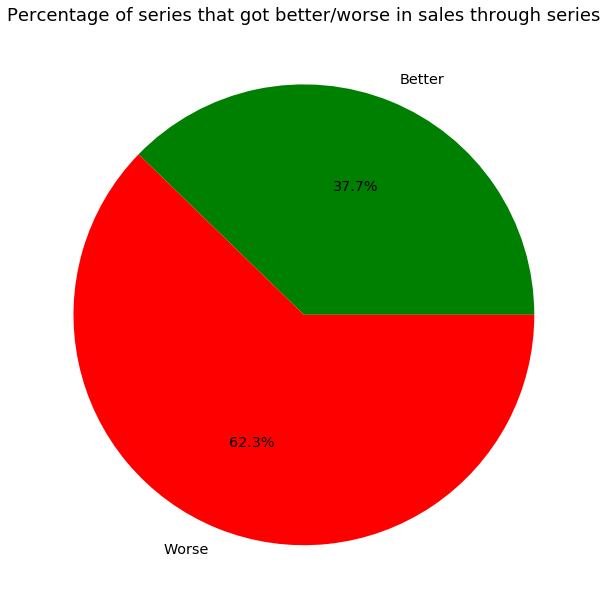

In [72]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_axes([0.1, 0.1,0.8,0.8])
plt.title('Percentage of series that got better/worse in sales through series',fontsize=18)

labels = 'Better', 'Worse'
colors= 'green','red'
fracs = [long_sales_better,long_sales_worse]

patches, texts, autotexts = ax.pie(fracs, labels=labels, colors=colors, autopct='%1.1f%%')

proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.show()

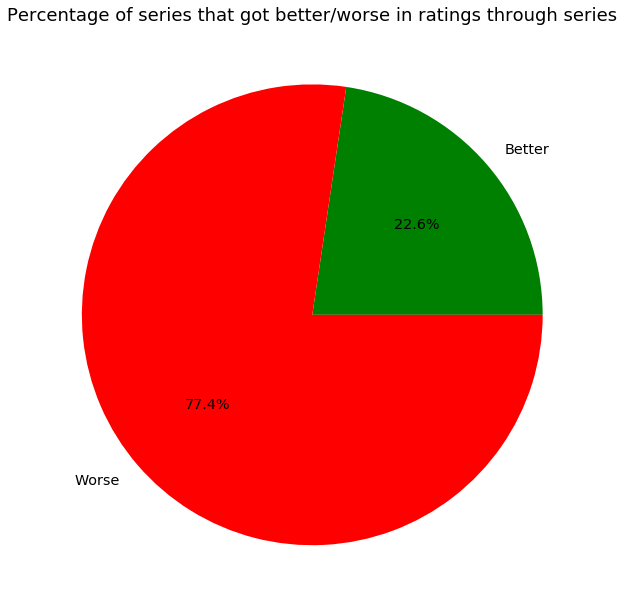

In [73]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_axes([0.1, 0.1,0.8,0.8])
plt.title('Percentage of series that got better/worse in ratings through series',fontsize=18)

labels = 'Better', 'Worse'
colors= 'green','red'
fracs = [long_ratings_better,long_ratings_worse]

patches, texts, autotexts = ax.pie(fracs, labels=labels, colors=colors, autopct='%1.1f%%')

proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.show()

The results are almost the exact same as before. My initial thought seems to be wrong.

## **Series that have lasted less than or equal to 6 years**

In [74]:
newdf=df[df['length']<=6]
table = pd.pivot_table(newdf,index=['release_year'],
                     columns=['series_name'],values=['global_sales'],aggfunc=np.median)
table.columns = table.columns.get_level_values(1)

table1 = pd.pivot_table(newdf,index=['release_year'],
                     columns=['series_name'],values=['meta_critic_score'],aggfunc=np.median)
table1.columns = table1.columns.get_level_values(1)

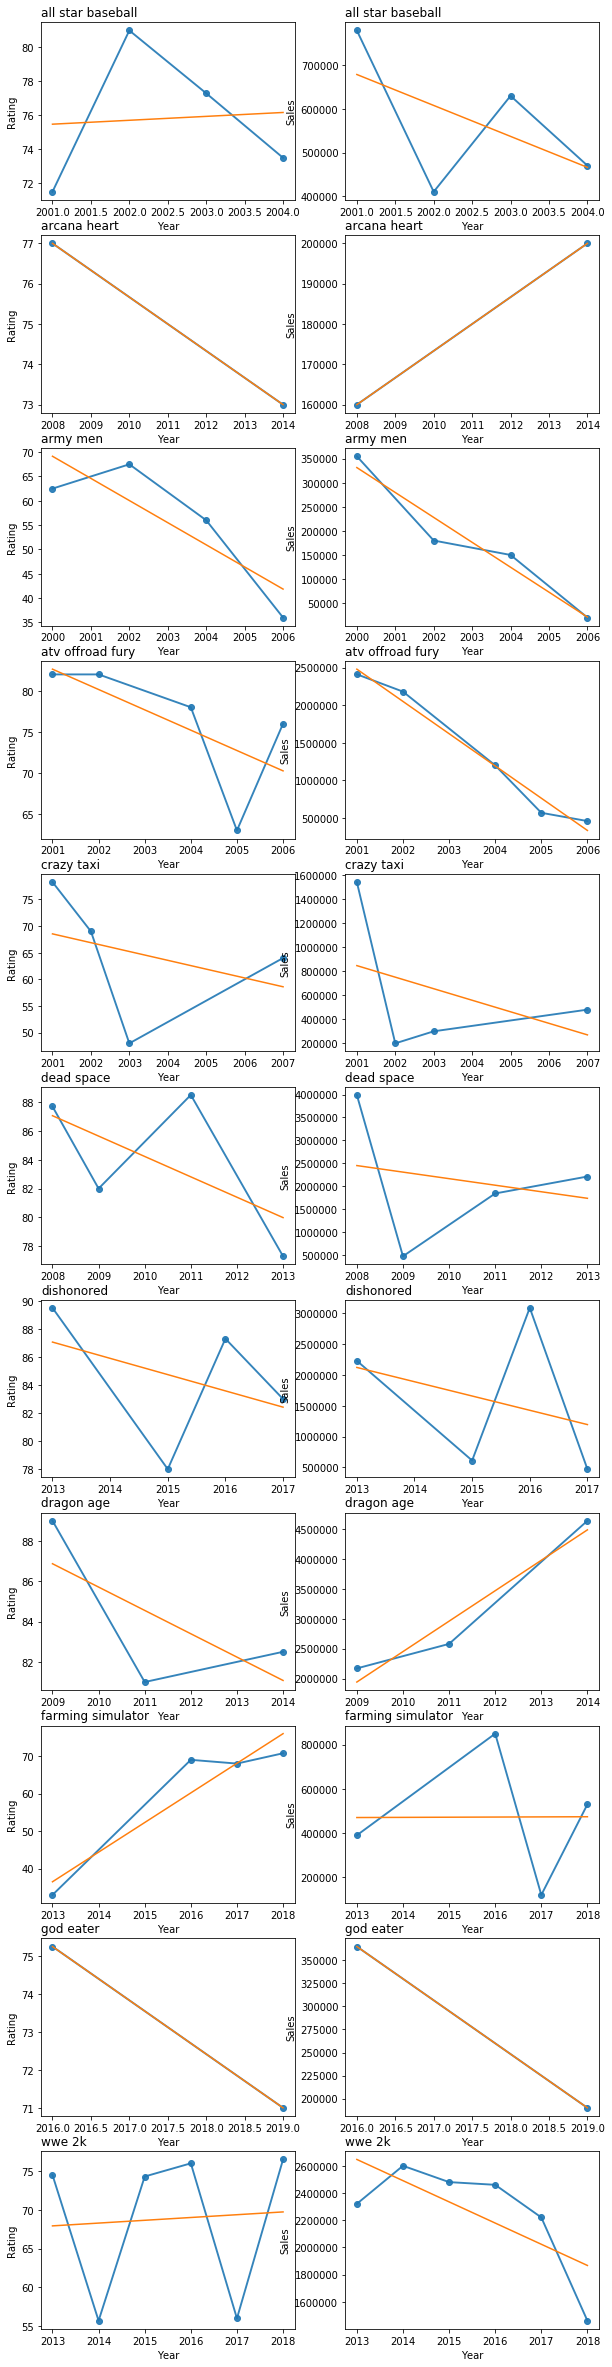

In [75]:
# multiple line plot
num=1
ratings_better_list=[]
sales_better_list=[]
short_sales_better=0
short_sales_worse=0
short_ratings_better=0
short_ratings_worse=0
plt.figure(figsize=(10,250))
for column in table1:
    data= table1[column].dropna()
    years=data.index
    values=data.values
    labels=table1.index
    # Find the right spot on the plot
    plt.subplot(64,2, num)
    # Plot the lineplot
    plt.plot(years,values, marker='o',linewidth=1.9, alpha=0.9, label=column)
    plt.xlabel('Year')
    plt.ylabel('Rating')
    #plt.xticks(labels)
    
    m, b = np.polyfit(data.index, data.values,1)
    if m > 0:
        short_ratings_better+=1
        ratings_better_list.append(column)
    else:
        short_ratings_worse+=1
    
    plt.plot(data.index, m*data.index + b)
    plt.title(column, loc='left', fontsize=12, fontweight=0 )
    
    plt.subplot(64,2, num+1)
    plt.plot(table[column].dropna(), marker='o',linewidth=1.9, alpha=0.9, label=column)
    data1= table[column].dropna()
    m1, b1 = np.polyfit(data1.index, data1.values,1)
    if m1 > 0:
        short_sales_better+=1
        sales_better_list.append(column)
    else:
        short_sales_worse+=1
    plt.plot(data1.index, m1*data.index + b1)
    plt.xlabel('Year')
    plt.ylabel('Sales')
    #plt.xticks(labels,rotation=90)

 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0 )
    num+=2


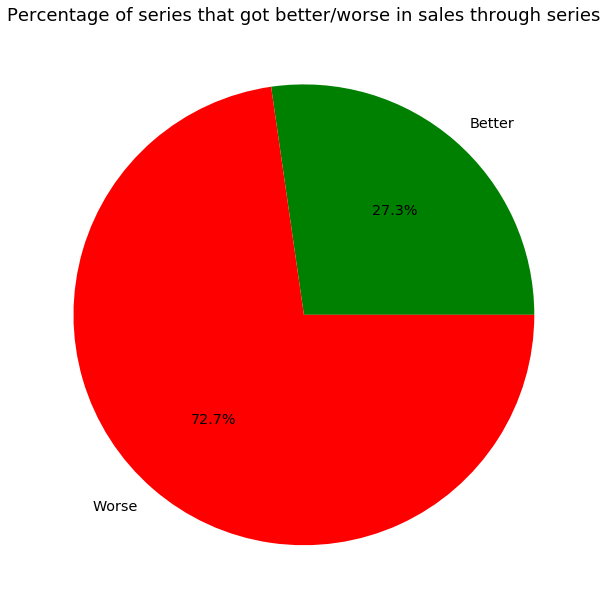

In [76]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_axes([0.1, 0.1,0.8,0.8])
plt.title('Percentage of series that got better/worse in sales through series',fontsize=18)

labels = 'Better', 'Worse'
colors= 'green','red'
fracs = [short_sales_better,short_sales_worse]

patches, texts, autotexts = ax.pie(fracs, labels=labels, colors=colors, autopct='%1.1f%%')

proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.show()

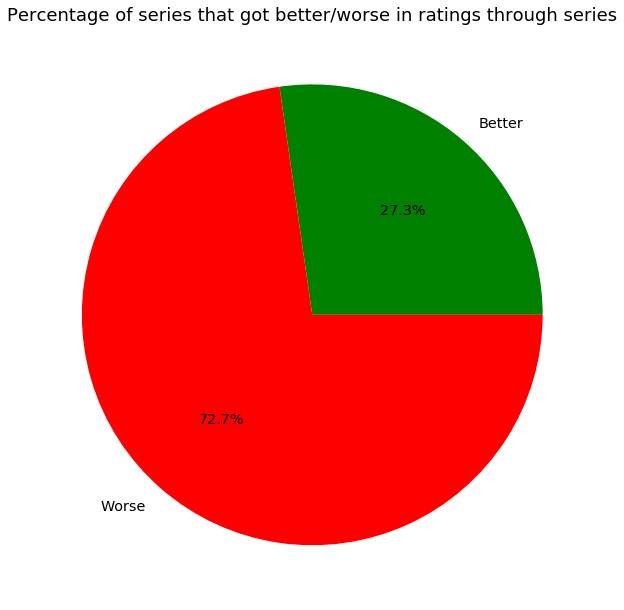

In [77]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_axes([0.1, 0.1,0.8,0.8])
plt.title('Percentage of series that got better/worse in ratings through series',fontsize=18)

labels = 'Better', 'Worse'
colors= 'green','red'
fracs = [short_ratings_better,short_ratings_worse]

patches, texts, autotexts = ax.pie(fracs, labels=labels, colors=colors, autopct='%1.1f%%')

proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.show()

The results here are almost the exact same as the other two. The length of the series doesnt seem to have much effect on whether the rating/sales get better or worse. I think its safe to conclude that on average, video game series get worse. 

In [97]:
data = {'Outcome': ['Better', 'Worse'],'Overall':[sales_better, sales_worse], 'long':[long_sales_better, long_sales_worse],'short':[short_sales_better, short_sales_worse]}
df = pd.DataFrame(data)

In [98]:
df

Outcome  Overall  long  short
0  Better       23    20      3
1   Worse       41    33      8